In [1]:
# cd C:\Users\mpoli\Desktop\Git\Deeplearning\Pandas_data_analysis
# jupyter nbconvert --to script iris.ipynb

import urllib.request as req # 웹에서 다운로드 할 때
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # K-평균 알고리즘
from sklearn.preprocessing import StandardScaler # 데이터 Nomalization
from sklearn.decomposition import PCA
import pandas as pd
import os 

In [2]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
DATA_PATH = os.path.join('data') # data save folder
ColumnList = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'] # iris data의 Column List

In [3]:
def fetch_iris_data(): # data 폴더와 iris의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_iris_data(): # iris data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [4]:
fetch_iris_data()
iris = load_iris_data()

ClassList = iris['class'].unique() #class의 List (꽃 종류)
feature = iris[['sepal length (cm)','sepal width (cm)']]

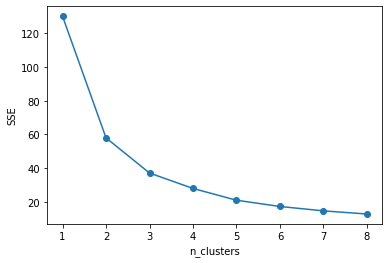

In [5]:
def elbow(X):
    sse=[]
    for i in range(1,9):
        model = KMeans(n_clusters=i, init='k-means++', random_state = 0) #KMeans++는 잘못된 point를 잡는 경우를 대비해 만들어진 initializer 중 하나, random_state = 시드값)
        model.fit(X)
        sse.append(model.inertia_) # inertia_: 관성
    plt.plot(range(1,9), sse, marker='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(feature)

In [6]:
model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화 할 것
model.fit(feature)
predict = pd.DataFrame(model.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,sepal length (cm),sepal width (cm),predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


그냥 점으로 되어있는것보다는 산점도 (scatter)을 이용한 방식이 더 직관적임

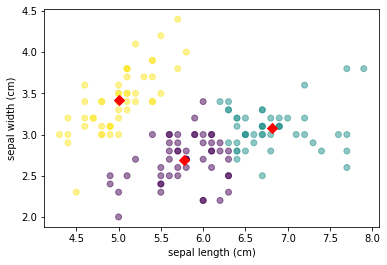

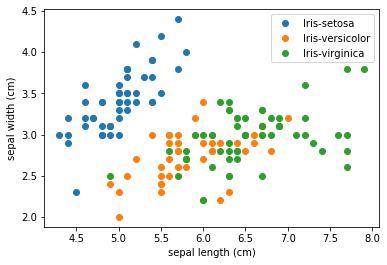

In [7]:

plt.scatter(r['sepal length (cm)'],r['sepal width (cm)'],c=r['predict'],alpha=0.5) 
# c의 값은 색을 지정할 수도 있고 지금과 같이 쓸 경우 산점도의 카테고리를 나누는 기능도 수행 할 수 있음, alpha는 색상의 투명도
centers = pd.DataFrame(model.cluster_centers_,columns=['sepal length (cm)','sepal width (cm)'])
center_x = centers['sepal length (cm)']
center_y = centers['sepal width (cm)']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


for flower in ClassList:
    flowerList = iris[iris['class']==flower]
    plt.plot(flowerList[ColumnList[0]], flowerList[ColumnList[1]], 'o')

plt.xlabel(ColumnList[0])
plt.ylabel(ColumnList[1])
plt.legend(ClassList, loc='best')

clustering 된 값과 실제 분할된 값들을 비교해 본 결과 완벽하게 분류가 되지는 않음

In [8]:
df=pd.DataFrame({'predict':predict['predict'],'class':iris['class']})
ct = pd.crosstab(df['predict'], df['class'])
ct

class,Iris-setosa,Iris-versicolor,Iris-virginica
predict,,,
0,0,38,15
1,0,12,35
2,50,0,0


위 데이터를 봤을 때 setosa는 100%, versicolor는 72%, virginica는 70% 의 정확도로 분류 된것을 알 수 있음   
데이터를 봤을 때 setosa는 100%, versicolor는 72%, virginica는 70% 의 정확도로 분류 된것을 알 수 있음  
PCA를 이용해서 4개의 Column을 2개로 축소 후 clustering 해 보자

In [9]:
data = pd.DataFrame(iris[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled = pd.DataFrame(result, columns=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [10]:
pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)
result
result = pd.DataFrame(result, columns=['x','y'])
new_iris = pd.concat([result, iris['class']], axis=1)
new_iris

,x,y,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [11]:
feature = new_iris[['x','y']]
model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화 할 것
model.fit(feature)
predict = pd.DataFrame(model.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,0
146,1.558492,-0.905314,2
147,1.520845,0.266795,0
148,1.376391,1.016362,0


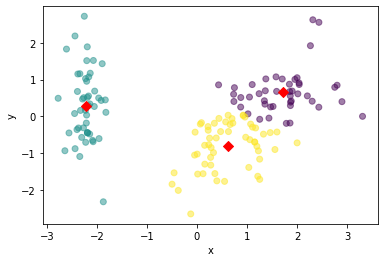

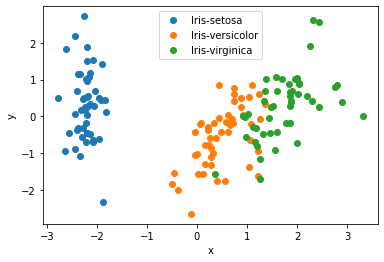

In [12]:
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5) 
# c의 값은 색을 지정할 수도 있고 지금과 같이 쓸 경우 산점도의 카테고리를 나누는 기능도 수행 할 수 있음, alpha는 색상의 투명도
centers = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
center_x = centers['x']
center_y = centers['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for flower in ClassList:
    flowerList = new_iris[new_iris['class']==flower]
    plt.plot(flowerList['x'],flowerList['y'], 'o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(ClassList, loc='best')

In [24]:
df=pd.DataFrame({'predict':predict['predict'],'class':new_iris['class']})
ct = pd.crosstab(df['predict'], df['class'])
ct

class,Iris-setosa,Iris-versicolor,Iris-virginica
predict,,,
0,0,11,34
1,50,0,0
2,0,39,16


정확도는 100%, 78%, 72% 순이다.

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(predict, new_iris['class'])

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -0.59794872, -0.59794872, -0.59794872,  0.55102041,  0.55102041,
        0.55102041, -0.59794872,  0.55102041,  0.55102041,  0.55102041,
        0.55102041,  0.55102041,  0.55102041,  0.55102041,  0.55102041,
       -0.59794872,  0.55102041,  0.55102041,  0.55102041,  0.55